In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

In [2]:
data = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/evaluation.dta")
data.columns

Index(['locality_identifier', 'household_identifier', 'treatment_locality',
       'promotion_locality', 'eligible', 'enrolled', 'enrolled_rp',
       'poverty_index', 'round', 'health_expenditures', 'age_hh', 'age_sp',
       'educ_hh', 'educ_sp', 'female_hh', 'indigenous', 'hhsize', 'dirtfloor',
       'bathroom', 'land', 'hospital_distance', 'hospital'],
      dtype='object')

In [3]:
cutoff = 58
data = data[data.treatment_locality == 1]
data["treatment"] = data.poverty_index <= cutoff
features = ["poverty_index", "health_expenditures", "treatment"]
data = data[features]

C:\Users\Jhon\AppData\Local\Temp\ipykernel_9804\4043806982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['y_hat'] = np.concatenate(LinearRegression().fit(x, y).predict(x))
C:\Users\Jhon\AppData\Local\Temp\ipykernel_9804\4043806982.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['y_hat'] = np.concatenate(LinearRegression().fit(x1, y1).predict(x1))
C:\Users\Jhon\AppData\Local\Temp\ipykernel_9804\4043806982.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

Text(0, 0.5, 'Health Expenditures ($)')

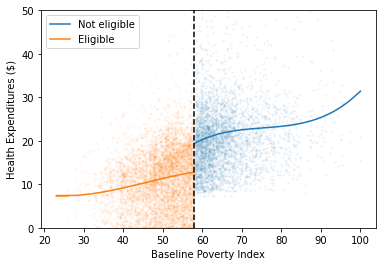

In [4]:
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
fmla = "health_expenditures ~ bs(poverty_index, df = 3)"
data_0 = data[data.treatment == 0]
data_1 = data[data.treatment == 1]
y, x = dmatrices(fmla, data_0, return_type="dataframe")
y1, x1 = dmatrices(fmla, data_1, return_type = "dataframe")
data_0['y_hat'] = np.concatenate(LinearRegression().fit(x, y).predict(x))
data_1['y_hat'] = np.concatenate(LinearRegression().fit(x1, y1).predict(x1))
data_0.sort_values(by = "y_hat", inplace=True)
data_1.sort_values(by = "y_hat", inplace = True)
plt.plot("poverty_index", "y_hat", data = data_0, label = "Not eligible")
plt.plot("poverty_index", "y_hat", data = data_1, label = "Eligible")
plt.scatter("poverty_index", "health_expenditures", alpha = .05, s = 2, data = data_0, label = "")
plt.scatter("poverty_index", "health_expenditures", alpha = .05, s = 2, data = data_1, label = "")
plt.ylim(0, 50)
plt.legend()
plt.axvline(cutoff, color = "black", linestyle = "--")
plt.xlabel("Baseline Poverty Index")
plt.ylabel("Health Expenditures ($)")
# plt.plot(

Text(59, 19.468902369150367, '')

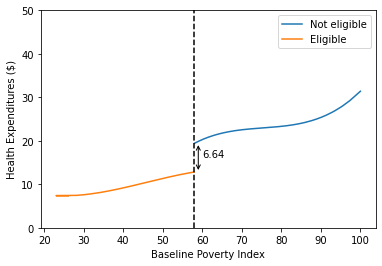

In [5]:
min_max = min(data_0.y_hat)
max_min = max(data_1.y_hat)
plt.plot("poverty_index", "y_hat", data = data_0, label = "Not eligible")
plt.plot("poverty_index", "y_hat", data = data_1, label = "Eligible")
plt.ylim(0, 50)
plt.legend()
plt.axvline(cutoff, color = "black", linestyle = "--")
plt.xlabel("Baseline Poverty Index")
plt.ylabel("Health Expenditures ($)")
c = np.mean([min_max, max_min])
effect = np.round((min_max - max_min), 2)
plt.annotate(f"{effect}", xy = (60, c))
plt.annotate("", xy = (59, max_min), xytext = (59, min_max), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"))

In [6]:
h = plt.hist2d("poverty_index", "health_expenditures", data = data, bins=(bnds_x_1, bnds_y), cmap = "Blues")
plt.colorbar(h[3])
plt.plot("poverty_index", "y_hat", data = data_0, label = "Not eligible")
plt.plot("poverty_index", "y_hat", data = data_1, label = "Eligible")
bnds_y = np.arange(0, 50, 2.5)
bnds_x_1 = np.arange(20, 100, 2.5)
# bnds_x_0 = np.arange(48, 100, 2.5)

# plt.hist2d("poverty_index", "health_expenditures", data = data_1, bins=(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1)))
plt.ylim(-5, 50)
plt.legend()
plt.axvline(cutoff, color = "black", linestyle = "--")
plt.xlabel("Baseline Poverty Index")
plt.ylabel("Health Expenditures ($)")


NameError: name 'bnds_x_1' is not defined